In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
import torch
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import get_test_pipeline_cfg
import mmcv
config_file = "./fasterRCNN/config.py"
checkpoint_file = "./fasterRCNN/epoch_4.pth" # 请将训练好的权重文件放在该位置
image_file = "./fasterRCNN/imgs/test_3.png" # 请将需要检验的图放在该位置
model = init_detector(config_file, checkpoint_file, device="cuda:0")

Loads checkpoint by local backend from path: ./fasterRCNN/epoch_4.pth


In [94]:
from utils import load_data

data = load_data(model, image_file)
with torch.no_grad():
    feature = model.extract_feat(data["inputs"][0].unsqueeze(0).float().cuda())
    (cls_scores, bbox_shift) = model.rpn_head.forward(feature)
    anchor_generator = model.rpn_head.prior_generator
    feature_map_size = [feature[i].size()[-2:] for i in range(len(feature))]
    anchors = anchor_generator.grid_priors(feature_map_size, device="cuda")

In [95]:
cls_scores = [cls_score.squeeze() for cls_score in cls_scores]
bbox_shift = [shift.squeeze() for shift in bbox_shift]

boxes = model.rpn_head._predict_by_feat_single(
    cls_score_list = cls_scores,
    bbox_pred_list = bbox_shift,
    score_factor_list = None,
    mlvl_priors = anchors,
    img_meta = data["data_samples"][0].to_dict(),
    cfg = None,
    rescale = True,

)

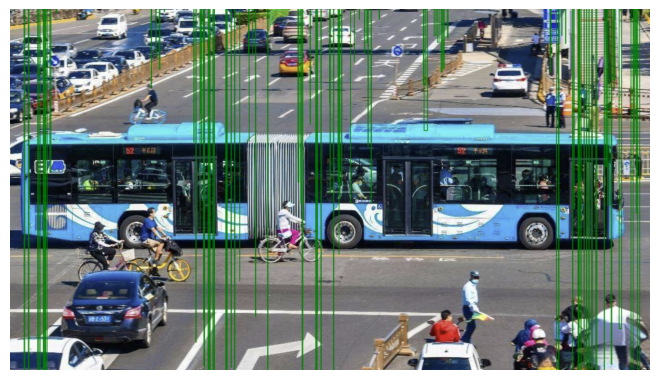

In [96]:
from mmengine.visualization import Visualizer
import numpy as np

boxes.bboxes[0:5]
visualizer = Visualizer(image=mmcv.imread(image_file,channel_order='rgb'));
visualizer.draw_bboxes(boxes.bboxes[0:100]);
visualizer.show()

In [97]:
result = inference_detector(model, image_file)

In [98]:
from mmdet.visualization import local_visualizer as lv
from mmdet.evaluation.functional import get_classes

visualizer = lv.DetLocalVisualizer()
class_names = get_classes("voc")
visualizer.dataset_meta["classes"] = class_names
visualizer.dataset_meta["palette"] = [
    (106, 0, 228),
    (119, 11, 32),
    (165, 42, 42),
    (0, 0, 192),
    (197, 226, 255),
    (0, 60, 100),
    (0, 0, 142),
    (255, 77, 255),
    (153, 69, 1),
    (120, 166, 157),
    (0, 182, 199),
    (0, 226, 252),
    (182, 182, 255),
    (0, 0, 230),
    (220, 20, 60),
    (163, 255, 0),
    (0, 82, 0),
    (3, 95, 161),
    (0, 80, 100),
    (183, 130, 88),
]

In [99]:
visualizer.add_datasample(
            "Plot1",
            mmcv.imread(image_file,channel_order='rgb'),
            result,
            draw_gt= False,
            draw_pred = True,
            show = True,
            wait_time = 0,
            out_file = None,
            pred_score_thr = 0.3,
            step = 0);

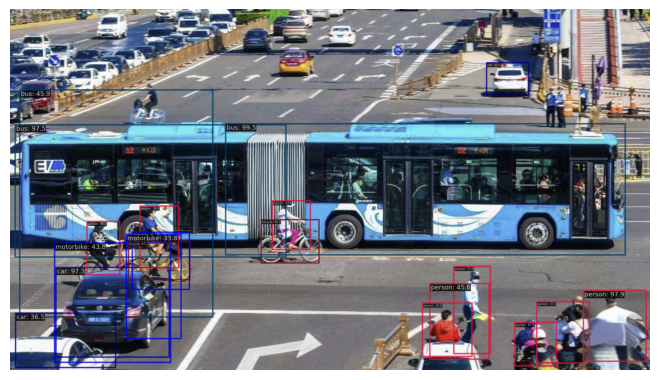

In [100]:
visualizer.show()

In [101]:
config_file = "./yolov3/config.py"
checkpoint_file = "./yolov3/epoch_6.pth"
model = init_detector(config_file, checkpoint_file, device="cuda:0")

Loads checkpoint by local backend from path: ./yolov3/epoch_6.pth


In [105]:
result = inference_detector(model, image_file)
visualizer = lv.DetLocalVisualizer()
class_names = get_classes("voc")
visualizer.dataset_meta["classes"] = class_names
visualizer.dataset_meta["palette"] = [
    (106, 0, 228),
    (119, 11, 32),
    (165, 42, 42),
    (0, 0, 192),
    (197, 226, 255),
    (0, 60, 100),
    (0, 0, 142),
    (255, 77, 255),
    (153, 69, 1),
    (120, 166, 157),
    (0, 182, 199),
    (0, 226, 252),
    (182, 182, 255),
    (0, 0, 230),
    (220, 20, 60),
    (163, 255, 0),
    (0, 82, 0),
    (3, 95, 161),
    (0, 80, 100),
    (183, 130, 88),
]
visualizer.add_datasample(
            "Plot1",
            mmcv.imread(image_file,channel_order='rgb'),
            result,
            draw_gt= False,
            draw_pred = True,
            show = True,
            wait_time = 0,
            out_file = None,
            pred_score_thr = 0.3,
            step = 0);

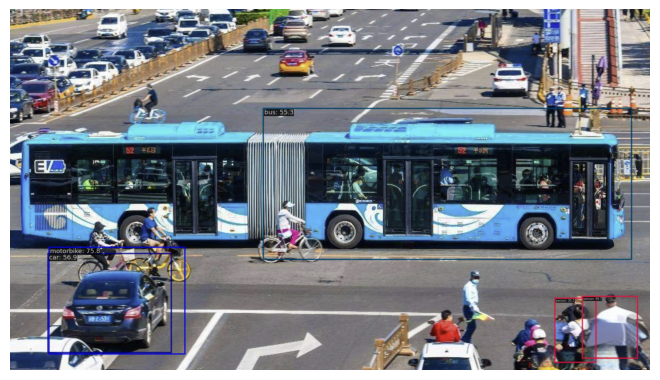

In [106]:
visualizer.show()